In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import scipy as stats
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Regression/Daily%20Demand%20Forecasting%20Orders.csv')
data

,Unnamed: 0,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


In [4]:
data.isna().sum()

Unnamed: 0                                                            0
Week of the month (first week, second, third, fourth or fifth week    0
Day of the week (Monday to Friday)                                    0
Non-urgent order                                                      0
Urgent order                                                          0
Order type A                                                          0
Order type B                                                          0
Order type C                                                          0
Fiscal sector orders                                                  0
Orders from the traffic controller sector                             0
Banking orders (1)                                                    0
Banking orders (2)                                                    0
Banking orders (3)                                                    0
Target (Total orders)                                           

In [5]:
data.columns

Index(['Unnamed: 0',
       'Week of the month (first week, second, third, fourth or fifth week',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

In [7]:
data1=data.drop('Unnamed: 0',axis=1)

In [8]:
data1.isna().sum()

Week of the month (first week, second, third, fourth or fifth week    0
Day of the week (Monday to Friday)                                    0
Non-urgent order                                                      0
Urgent order                                                          0
Order type A                                                          0
Order type B                                                          0
Order type C                                                          0
Fiscal sector orders                                                  0
Orders from the traffic controller sector                             0
Banking orders (1)                                                    0
Banking orders (2)                                                    0
Banking orders (3)                                                    0
Target (Total orders)                                                 0
dtype: int64

In [9]:
data1.shape

(60, 13)

In [10]:
data1.head(2)

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.0,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.0,40419,21399,89461,7679,224.675


In [11]:
data1.tail(2)

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
58,5,5,196.555,108.395,76.763,96.478,131.709,0.000,37011,109931,50112,12957,304.95
59,5,6,192.116,121.106,107.568,121.152,103.180,18.678,27328,108072,56015,10690,331.90


In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Week of the month (first week, second, third, fourth or fifth week  60 non-null     int64  
 1   Day of the week (Monday to Friday)                                  60 non-null     int64  
 2   Non-urgent order                                                    60 non-null     float64
 3   Urgent order                                                        60 non-null     float64
 4   Order type A                                                        60 non-null     float64
 5   Order type B                                                        60 non-null     float64
 6   Order type C                                                        60 non-null     float64
 7   Fiscal sector order

In [13]:
data.describe()

,Unnamed: 0,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,29.500000,3.016667,4.033333,172.554933,118.920850,52.112217,109.229850,139.531250,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,17.464249,1.282102,1.401775,69.505788,27.170929,18.829911,50.741388,41.442932,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,0.000000,1.000000,2.000000,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,14.750000,2.000000,3.000000,125.348000,100.888000,39.456250,74.916250,113.632250,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,29.500000,3.000000,4.000000,151.062500,113.114500,47.166500,99.482000,127.990000,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,44.250000,4.000000,5.000000,194.606500,132.108250,58.463750,132.171000,160.107500,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,59.000000,5.000000,6.000000,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


In [14]:
data1.columns

Index(['Week of the month (first week, second, third, fourth or fifth week',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

In [15]:
x_data=data1[['Week of the month (first week, second, third, fourth or fifth week',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)']]

In [16]:
x_data

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948


In [17]:
y_data=data1['Target (Total orders)']

In [18]:
y_data

0     539.577
1     224.675
2     129.412
3     317.120
4     210.517
5     207.364
6     263.043
7     248.958
8     344.291
9     248.428
10    281.420
11    243.568
12    308.178
13    363.402
14    336.872
15    246.992
16    308.880
17    233.126
18    404.380
19    298.560
20    229.249
21    236.304
22    297.174
23    409.401
24    231.035
25    238.826
26    235.598
27    242.112
28    490.790
29    289.657
30    298.459
31    323.603
32    616.453
33    346.035
34    307.645
35    253.847
36    530.944
37    333.359
38    306.356
39    416.830
40    415.187
41    268.002
42    234.503
43    234.724
44    230.064
45    357.394
46    259.246
47    244.235
48    402.607
49    255.061
50    342.606
51    268.640
52    188.601
53    202.022
54    213.509
55    316.849
56    286.412
57    303.447
58    304.950
59    331.900
Name: Target (Total orders), dtype: float64

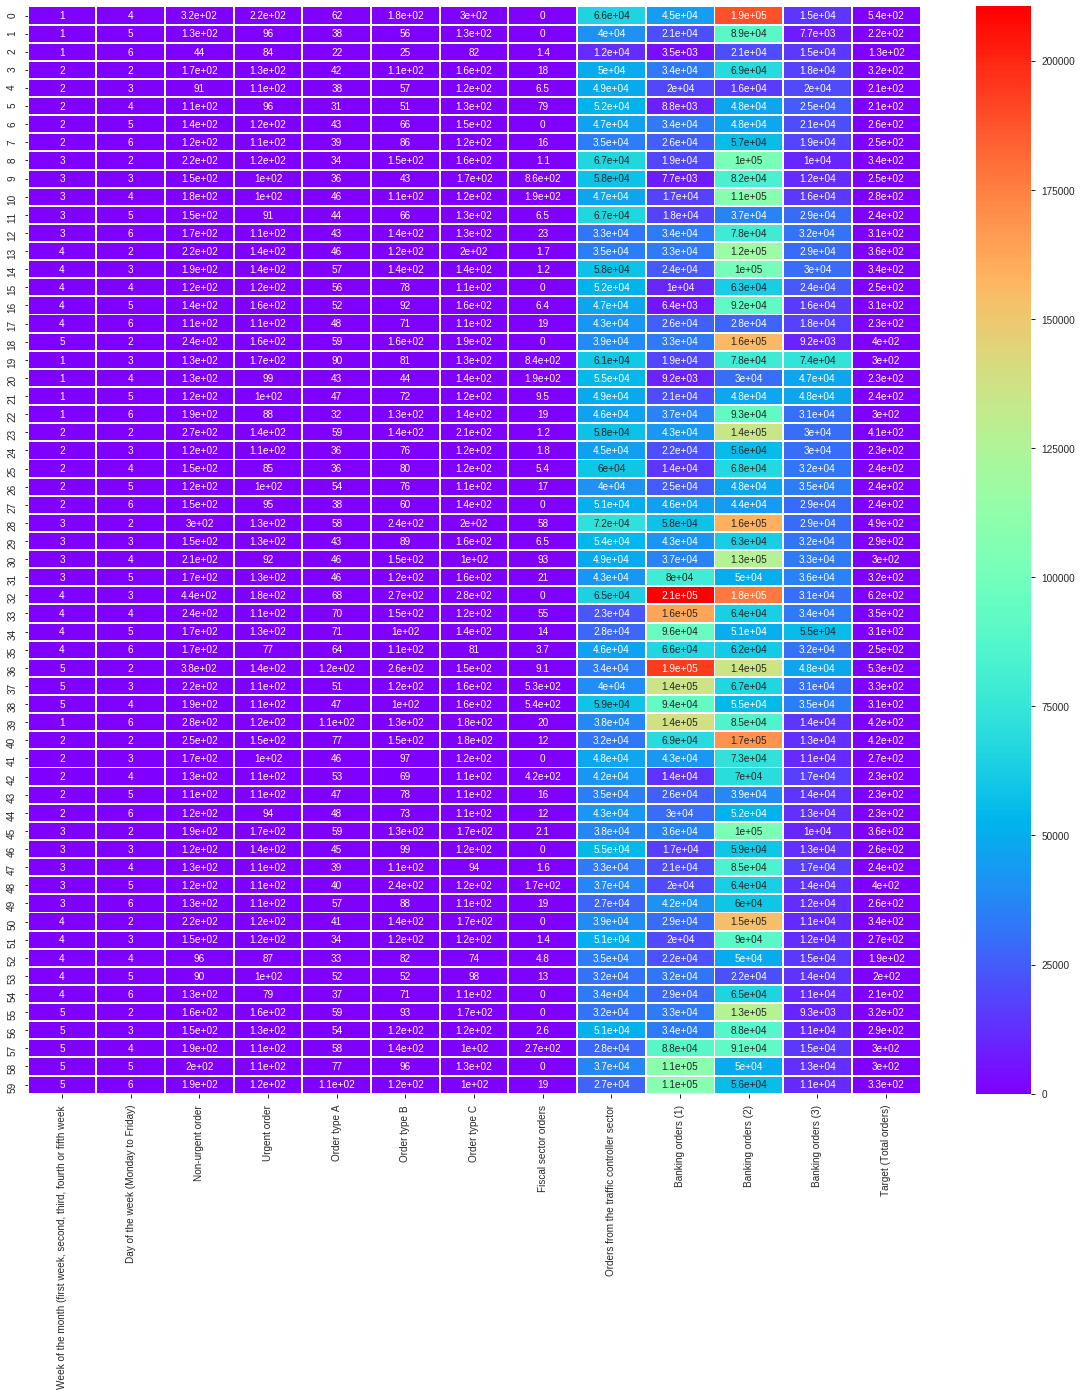

In [19]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(data1,ax=ax,annot=True,linewidth=0.9,cmap='rainbow')

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
X_traine,X_test,Y_traine,Y_test,=train_test_split(x_data,y_data,test_size=20)

In [24]:
X_traine.shape

(40, 12)

In [25]:
Y_traine.shape

(40,)

In [26]:
X_test.shape

(20, 12)

In [28]:
Y_test.shape

(20,)

In [29]:
model=LinearRegression(normalize=True)

In [30]:
model.fit(X_traine,Y_traine)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [31]:
trine_score=model.score(X_traine,Y_traine)
trine_score

1.0

In [32]:
test_score=model.score(X_test,Y_test)
test_score

1.0

In [33]:
model.coef_

array([-7.09324486e-15,  1.06602233e-14,  1.05616286e-15,  1.65495575e-15,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.15818797e-16,
        1.11804826e-18, -1.16998568e-19,  6.50906925e-20,  4.03332699e-20])

In [34]:
model.intercept_

-2.8421709430404007e-13

In [35]:
New_predication = model.predict(X_test)

In [36]:
pd.DataFrame({'New_predication':New_predication,
             "ActualData":Y_test,
             "Error":Y_test-New_predication,
             "MSE":np.sqrt(np.mean(Y_test-New_predication))})

/home/manikanta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


,New_predication,ActualData,Error,MSE
48,402.607,402.607,-5.684342e-14,NaN
8,344.291,344.291,-1.136868e-13,NaN
45,357.394,357.394,-2.273737e-13,NaN
38,306.356,306.356,-2.273737e-13,NaN
16,308.880,308.880,-1.136868e-13,NaN
17,233.126,233.126,-2.842171e-14,NaN
50,342.606,342.606,-2.273737e-13,NaN
25,238.826,238.826,-5.684342e-14,NaN
35,253.847,253.847,-5.684342e-14,NaN
43,234.724,234.724,-2.842171e-14,NaN


In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [38]:
r2_score(Y_test,New_predication)

1.0

In [39]:
mean_squared_error(Y_test,New_predication)

3.198862525107412e-26

In [40]:
mean_absolute_error(Y_test,New_predication)

1.4495071809506043e-13

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
cv = cross_val_score(model,X_traine,Y_traine,cv = 10)
cv

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [43]:
np.min(cv)

1.0

In [44]:
np.max(cv)

1.0